In [23]:
library(foreign)
library(dplyr)
library(psych)
library(lavaan)
library(semTools)

ERROR: Error in library(semTools): there is no package called ‘semTools’


In [2]:
rdqPre = read.spss('../Data/PrePostMeasures/RDQPre_1.sav', to.data.frame = T)[,2:61]
rdqPost = read.spss('../Data/PrePostMeasures/RDQPost_1.sav', to.data.frame = T)[,2:61]

Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 12 added in variable: rdqpre_35_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 10 added in variable: rdqpre_43_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 10 added in variable: rdqpre_44_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 10 added in variable: rdqpre_49_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 3 added in variable: rdqpre_52_1”
Warning message in read.spss("../Data/PrePostMeasures/RDQPre_1.sav", to.data.frame = T):
“Undeclared level(s) 2 added in variable: PrimaryLast”
Warning message in read.spss("../Data/PrePostMeasures/RDQPost_1.sav", to.data.frame = T):
“Undeclared level(s) 11 added in variable:

In [3]:
rdqRecode = function(x){
    factor(x, levels = c('not at all or rarely true','sometimes true','often or almost always true'),
                          labels = c(0,1,2))
}

rdqPreC = data.frame(lapply(rdqPre, rdqRecode))
rdqPostC = data.frame(lapply(rdqPost, rdqRecode))

In [4]:
rdqPreC = na.omit(rdqPreC)
rdqPostC = na.omit(rdqPostC)

In [5]:
set.seed(123)
rdqPreTraingSample = sample(c(1:nrow(rdqPreC)), nrow(rdqPreC)*0.8)
rdqPostTrainingSample = sample(c(1:nrow(rdqPostC)), nrow(rdqPostC)*0.8)
rdqPreTraining = rdqPreC[rdqPreTraingSample,]
rdqPreTesting = rdqPreC[-rdqPreTraingSample,]
rdqPostTraining = rdqPostC[rdqPostTrainingSample,]
rdqPostTesting = rdqPostC[-rdqPostTrainingSample,]

In [6]:
rdqPrePoly = polychoric(rdqPreTraining)
rdqPostPoly = polychoric(rdqPostTraining)

Converted non-numeric input to numeric

Converted non-numeric input to numeric



Parallel analysis suggests that the number of factors =  33  and the number of components =  11 


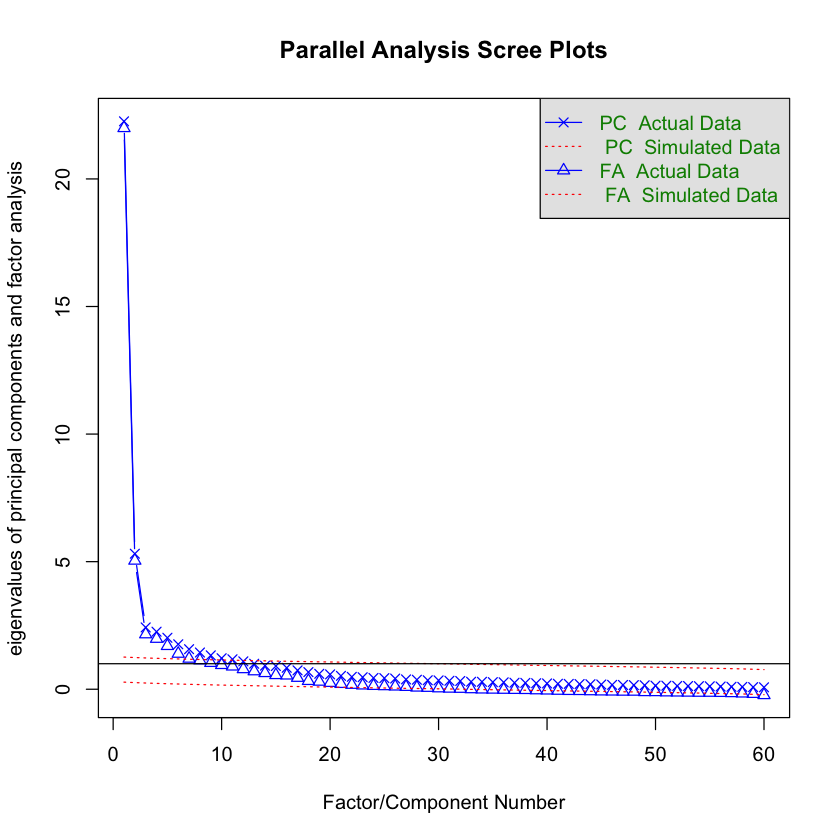

Parallel analysis suggests that the number of factors =  59  and the number of components =  7 


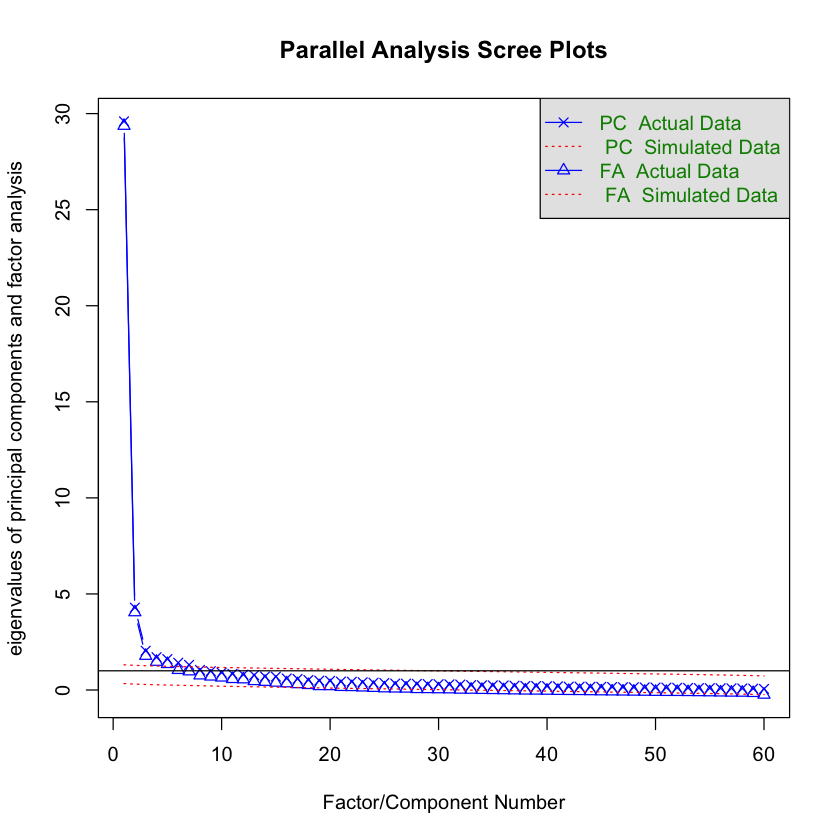

In [8]:
rdqPreScree= fa.parallel(rdqPrePoly$rho,n.iter=20,SMC=TRUE,  fm = "minres", cor = 'poly', fa="both", n.obs = nrow(rdqPreTraining)) 
rdqPostScree = fa.parallel(rdqPostPoly$rho,n.iter=20,SMC=TRUE,  fm = "minres", cor = 'poly', fa="both", n.obs = nrow(rdqPostTraining)) 

In [9]:
rdqPreFa = fa(rdqPrePoly$rho, nfactors = 3, cor = 'poly', n.obs = nrow(rdqPreTraining))
#write.csv(rdqPreFa$loadings, '../Results/rdqPreFa.csv')
rdqPostFa = fa(rdqPostPoly$rho, nfactors = 3, cor = 'poly', n.obs = nrow(rdqPostTraining))
#write.csv(rdqPostFa$loadings, '../Results/rdqPostFa.csv')

Loading required namespace: GPArotation



In [10]:
colnames(rdqPreTesting) = paste0('rdq', c(1:60))
colnames(rdqPostTesting) = paste0('rdq', c(1:60))

rdqbind = rbind(rdqPreTesting,rdqPostTesting )
rdqbind$group = c(rep('pre', nrow(rdqPreTesting)), rep('post', nrow(rdqPostTesting)))
rdqbind = data.frame(lapply(rdqbind, as.ordered))

In [372]:
#paste0('rdq',c(43:60),collapse = ' + ')
rdqPreModel =
'mood_pos_coping_fun_well =~ rdq1 + rdq2 + rdq3 + rdq8 + rdq10 + rdq13 + rdq14 + rdq26 + rdq27 + rdq28 + rdq31 + rdq32 + rdq33 + rdq34 + rdq35 + rdq36 + rdq37 + rdq38 + rdq39 + rdq40 + rdq41 + rdq42 + rdq43 + rdq44 + rdq45 + rdq46 + rdq47 + rdq52 + rdq53 + rdq54 + rdq56 + rdq57 + rdq58 + rdq59 + rdq60
sym_neg_coping_fun =~  rdq1 + rdq2 + rdq3 + rdq4 + rdq6 + rdq8 + rdq9 + rdq11 + rdq12 +  rdq15 + rdq16 + rdq17 + rdq18 + rdq19 + rdq23 + rdq29 + rdq30 
relationship =~ rdq20 + rdq21 + rdq22  + rdq23 + rdq24 + rdq25 +  rdq47 + rdq50 + rdq51 + rdq55'

In [3]:
rdqPreCFA = cfa(rdqPreModel, data = rdqbind[rdqbind$group == 'pre',], estimator = "WLSMV",  ordered = colnames(rdqbind), std.lv = T)
summary(rdqPreCFA, fit.measures = TRUE, standardized = TRUE)

ERROR: Error in lavaan::lavaan(model = rdqPreModel, data = rdqbind[rdqbind$group == : object 'rdqbind' not found


In [11]:
rdqPostBiModel =
'g =~ rdq1 + rdq 2 + rdq3 + rdq4 + rdq6 + rdq8 + rdq9 + rdq10 + rdq11 + rdq12 +  rdq13 + rdq14 + rdq15 + rdq16 + rdq17 + rdq18 + rdq19 + rdq20 + rdq21 + rdq22 + rdq23 + rdq24 + rdq25 + rdq26 + rdq27 + rdq28 + rdq29 + rdq30 + rdq31 + rdq32 + rdq33 + rdq34 + rdq35 + rdq36 + rdq37 + rdq38 + rdq39 + rdq40 + rdq41 + rdq42 + rdq43 + rdq44 + rdq45 + rdq46 + rdq47 +  rdq49 + rdq50 + rdq51 + rdq53 + rdq54 + rdq56 + rdq57 + rdq58 + rdq59 + rdq60 
M1 =~ rdq26 + rdq27 + rdq28 + rdq31 + rdq32 + rdq33 + rdq34 + rdq35 + rdq36 + rdq37 + rdq38 + rdq39 + rdq40 + rdq41 + rdq42 + rdq43 + rdq44 + rdq45 + rdq46 + rdq47 +  rdq53 + rdq54 + rdq56 + rdq57 + rdq58 + rdq59 + rdq60
M2 =~  rdq1 + rdq 2 + rdq3 + rdq4 + rdq6 + rdq8 + rdq9 + rdq10 + rdq11 + rdq12 + rdq13 + rdq14 + rdq15 + rdq16 + rdq17 + rdq18 + rdq19 + rdq20 + rdq23 + rdq24 + rdq25 + rdq29 + rdq30 
M3 =~ rdq21 + rdq22 + rdq47 + rdq50 + rdq51

g ~~ 0*M1
g ~~ 0*M2
g ~~ 0*M3
M1 ~~ 0*M2
M1 ~~ 0*M3
M2 ~~ 0*M3
'

In [12]:
rdqPostCorrModel =
'M1 =~ rdq26 + rdq27 + rdq28 + rdq31 + rdq32 + rdq33 + rdq34 + rdq35 + rdq36 + rdq37 + rdq38 + rdq39 + rdq40 + rdq41 + rdq42 + rdq43 + rdq44 + rdq45 + rdq46 + rdq47 +  rdq53 + rdq54 + rdq56 + rdq57 + rdq58 + rdq59 + rdq60
M2 =~  rdq1 + rdq 2 + rdq3 + rdq4 + rdq6 + rdq8 + rdq9 + rdq10 + rdq11 + rdq12 + rdq13 + rdq14 + rdq15 + rdq16 + rdq17 + rdq18 + rdq19 + rdq20 + rdq23 + rdq24 + rdq25 + rdq29 + rdq30 
M3 =~ rdq21 + rdq22 + rdq47 + rdq50 + rdq51'

In [12]:
rdqPostBiCFA = cfa(rdqPostBiModel, data = rdqbind[rdqbind$group == 'post',], estimator = "WLSMV",  ordered = colnames(rdqbind), std.lv = T)
summary(rdqPostBiCFA, fit.measures = TRUE, standardized = TRUE)

lavaan 0.6-7 ended normally after 93 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        220
                                                      
  Number of observations                           639
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              4882.683    4983.149
  Degrees of freedom                              1375        1375
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.174
  Shift parameter                                          823.624
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            360723.497   54629.145
  Degrees of freedom             

In [13]:
rdqPostCorrCFA = cfa(rdqPostCorrModel, data = rdqbind[rdqbind$group == 'post',], estimator = "WLSMV",  ordered = colnames(rdqbind), std.lv = T)
summary(rdqPostCorrCFA, fit.measures = TRUE, standardized = TRUE)

lavaan 0.6-7 ended normally after 58 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        166
                                                      
  Number of observations                           639
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              7647.509    6317.562
  Degrees of freedom                              1373        1373
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.398
  Shift parameter                                          848.748
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            355927.808   53953.016
  Degrees of freedom             

In [13]:
rdqConfBi = cfa(rdqPostBiModel, data = rdqbind, group = 'group', estimator = "WLSMV",  ordered = colnames(rdqbind), std.lv = T)
summary(rdqConfBi , fit.measures = TRUE, standardized = TRUE)

lavaan 0.6-7 ended normally after 77 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        440
                                                      
  Number of observations per group:                   
    pre                                            889
    post                                           639
                                                      
Model Test User Model:
                                               Standard      Robust
  Test Statistic                              15435.828   14237.908
  Degrees of freedom                               2750        2750
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   1.222
  Shift parameter for each group:                                  
      pre                                                   935.407
      post  

In [ ]:
rdqMatricBi = cfa(rdqPostBiModel, data = rdqbind, group = 'group', estimator = "WLSMV",  ordered = colnames(rdqbind), std.lv = T,
               group.equal = "loadings")
summary(rdqMatricBi , fit.measures = TRUE, standardized = TRUE)

In [15]:
rdqScalarBi = cfa(rdqPostBiModel, data = rdqbind, group = 'group', estimator = "WLSMV",  ordered = colnames(rdqbind), std.lv = T,
               group.equal = c("loadings","intercepts"))
summary(rdqScalarBi , fit.measures = TRUE, standardized = TRUE)

lavaan 0.6-7 ended normally after 125 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        503
  Number of equality constraints                   220
                                                      
  Number of observations per group:                   
    pre                                            889
    post                                           639
                                                      
Model Test User Model:
                                               Standard      Robust
  Test Statistic                              16369.963   13620.216
  Degrees of freedom                               2907        2907
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   1.376
  Shift parameter for each group:                                  
      pre               

In [21]:
#compareFit(rdqConfBi, rdqMatricBi)
?compareFit